<a href="https://colab.research.google.com/github/RajaSubramanian10/ODI-Match-Result-Prediction/blob/main/ODI_Match_Result_Classification_using_Decision_trees_%26_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ODI Match Result Classification using Decision trees & Naive Bayes 
@Author: Mr. R. Raja Subramanian**

In [ ]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Winner','Result','Margin','BR','','Match','Ground','Date','']
  
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  with open("ESPNODIMatResults.csv", 'a') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)

url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;"
url2 = ""
url3 = "template=results;type=aggregate;view=results"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,20):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=2;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=3;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=4;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=5;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=6;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=7;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=8;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=9;template=results;type=aggregate;view=results
https://stats.espncricinfo.com/ci/engine/stats/index.htm

In [ ]:
import pandas as pd

df = pd.read_csv("ESPNODIMatResults.csv")
df.head()

df = df.drop('Unnamed: 4', axis = 1)
df = df.drop('Unnamed: 8', axis = 1)
df


,Winner,Result,Margin,BR,Match,Ground,Date
0,Australia,won,5 wickets,42.0,Australia v England,Melbourne,5 Jan 1971
1,England,won,6 wickets,35.0,England v Australia,Manchester,24 Aug 1972
2,Australia,won,5 wickets,21.0,England v Australia,Lord's,26 Aug 1972
3,England,won,2 wickets,21.0,England v Australia,Birmingham,28 Aug 1972
4,New Zealand,won,22 runs,NaN,New Zealand v Pakistan,Christchurch,11 Feb 1973
...,...,...,...,...,...,...,...
945,West Indies,won,96 runs,NaN,India v West Indies,Faridabad,17 Oct 1994
946,Australia,won,22 runs,NaN,Australia v South Africa,Faisalabad,18 Oct 1994
947,India,won,8 runs,NaN,India v West Indies,Wankhede,20 Oct 1994
948,Pakistan,won,39 runs,NaN,Pakistan v South Africa,Rawalpindi,20 Oct 1994


In [ ]:
# Preprocess the result column

nr = df[df['Result'] == 'n/r'].index
df.drop(nr, inplace=True)
df

,Winner,Result,Margin,BR,Match,Ground,Date
0,Australia,won,5 wickets,42.0,Australia v England,Melbourne,5 Jan 1971
1,England,won,6 wickets,35.0,England v Australia,Manchester,24 Aug 1972
2,Australia,won,5 wickets,21.0,England v Australia,Lord's,26 Aug 1972
3,England,won,2 wickets,21.0,England v Australia,Birmingham,28 Aug 1972
4,New Zealand,won,22 runs,NaN,New Zealand v Pakistan,Christchurch,11 Feb 1973
...,...,...,...,...,...,...,...
945,West Indies,won,96 runs,NaN,India v West Indies,Faridabad,17 Oct 1994
946,Australia,won,22 runs,NaN,Australia v South Africa,Faisalabad,18 Oct 1994
947,India,won,8 runs,NaN,India v West Indies,Wankhede,20 Oct 1994
948,Pakistan,won,39 runs,NaN,Pakistan v South Africa,Rawalpindi,20 Oct 1994


In [ ]:
ground = df['Ground'].unique()

In [ ]:
ground

array(['Melbourne', 'Manchester', "Lord's", 'Birmingham', 'Christchurch',
       'Swansea', 'Leeds', 'The Oval', 'Dunedin', 'Nottingham',
       'Adelaide', 'Auckland', 'Scarborough', 'Sialkot', 'Albion',
       'Sahiwal', 'Lahore', "St John's", 'Castries', 'Quetta', 'Sydney',
       'Brisbane', 'Karachi', 'Perth', 'Kingstown', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Colombo (SSC)', 'Wellington',
       'Amritsar', 'Delhi', 'Hyderabad (Sind)', 'Bengaluru', 'Gujranwala',
       'Multan', 'Port of Spain', 'Napier', "St George's",
       'Colombo (PSS)', 'Taunton', 'Leicester', 'Bristol', 'Worcester',
       'Southampton', 'Derby', 'Tunbridge Wells', 'Chelmsford',
       'Hyderabad (Deccan)', 'Jaipur', 'Srinagar', 'Vadodara', 'Indore',
       'Jamshedpur', 'Guwahati', 'Moratuwa', 'Sharjah', 'Kingston',
       'New Delhi', 'Peshawar', 'Faisalabad', 'Pune', 'Hobart', 'Nagpur',
       'Chandigarh', 'Bridgetown', 'Rawalpindi', 'Launceston', 'Kandy',
       'Colombo (RPS)', 'R

In [ ]:
# Preprocess the Ground column : categorical to numerical discrete
ground = df['Ground'].unique()
ground
grd = {}
id = 0
for i in ground:
  grd[i] = id
  id = id + 1

df['Ground'] = df['Ground'].map(grd)
df

,Winner,Result,Margin,BR,Match,Ground,Date
0,Australia,won,5 wickets,42.0,Australia v England,0,5 Jan 1971
1,England,won,6 wickets,35.0,England v Australia,1,24 Aug 1972
2,Australia,won,5 wickets,21.0,England v Australia,2,26 Aug 1972
3,England,won,2 wickets,21.0,England v Australia,3,28 Aug 1972
4,New Zealand,won,22 runs,NaN,New Zealand v Pakistan,4,11 Feb 1973
...,...,...,...,...,...,...,...
945,West Indies,won,96 runs,NaN,India v West Indies,77,17 Oct 1994
946,Australia,won,22 runs,NaN,Australia v South Africa,61,18 Oct 1994
947,India,won,8 runs,NaN,India v West Indies,73,20 Oct 1994
948,Pakistan,won,39 runs,NaN,Pakistan v South Africa,67,20 Oct 1994


In [ ]:
# Preprocess Match column to find Host
mat = df['Match']
host = []
opponent = []
for i in mat:
  k = i.split(' v ')
  host.append(k[0])
  opponent.append(k[1])

host

df['Host'] = host
df['Opponents'] = opponent
df

,Winner,Result,Margin,BR,Match,Ground,Date,Host,Opponents
0,Australia,won,5 wickets,42.0,Australia v England,0,5 Jan 1971,Australia,England
1,England,won,6 wickets,35.0,England v Australia,1,24 Aug 1972,England,Australia
2,Australia,won,5 wickets,21.0,England v Australia,2,26 Aug 1972,England,Australia
3,England,won,2 wickets,21.0,England v Australia,3,28 Aug 1972,England,Australia
4,New Zealand,won,22 runs,NaN,New Zealand v Pakistan,4,11 Feb 1973,New Zealand,Pakistan
...,...,...,...,...,...,...,...,...,...
945,West Indies,won,96 runs,NaN,India v West Indies,77,17 Oct 1994,India,West Indies
946,Australia,won,22 runs,NaN,Australia v South Africa,61,18 Oct 1994,Australia,South Africa
947,India,won,8 runs,NaN,India v West Indies,73,20 Oct 1994,India,West Indies
948,Pakistan,won,39 runs,NaN,Pakistan v South Africa,67,20 Oct 1994,Pakistan,South Africa


In [ ]:
# Compare host and winner to find update result

winner = df["Winner"]
host = df["Host"]

MatchResult = []
for i,j in zip(winner,host):
  if(i==j):
    MatchResult.append(1)
  else:
    MatchResult.append(0)

df['MatchResult']=MatchResult
df


,Winner,Result,Margin,BR,Match,Ground,Date,Host,Opponents,MatchResult
0,Australia,won,5 wickets,42.0,Australia v England,0,5 Jan 1971,Australia,England,1
1,England,won,6 wickets,35.0,England v Australia,1,24 Aug 1972,England,Australia,1
2,Australia,won,5 wickets,21.0,England v Australia,2,26 Aug 1972,England,Australia,0
3,England,won,2 wickets,21.0,England v Australia,3,28 Aug 1972,England,Australia,1
4,New Zealand,won,22 runs,NaN,New Zealand v Pakistan,4,11 Feb 1973,New Zealand,Pakistan,1
...,...,...,...,...,...,...,...,...,...,...
945,West Indies,won,96 runs,NaN,India v West Indies,77,17 Oct 1994,India,West Indies,0
946,Australia,won,22 runs,NaN,Australia v South Africa,61,18 Oct 1994,Australia,South Africa,1
947,India,won,8 runs,NaN,India v West Indies,73,20 Oct 1994,India,West Indies,1
948,Pakistan,won,39 runs,NaN,Pakistan v South Africa,67,20 Oct 1994,Pakistan,South Africa,1


In [ ]:
# Preprocess the Ground column : categorical to numerical discrete
winner = df['Winner'].unique()

win = {}
id = 0
for i in winner:
  win[i] = id
  id = id + 1

df['Winner'] = df['Winner'].map(win)
df

,Winner,Result,Margin,BR,Match,Ground,Date,Host,Opponents,MatchResult
0,0,won,5 wickets,42.0,Australia v England,0,5 Jan 1971,Australia,England,1
1,1,won,6 wickets,35.0,England v Australia,1,24 Aug 1972,England,Australia,1
2,0,won,5 wickets,21.0,England v Australia,2,26 Aug 1972,England,Australia,0
3,1,won,2 wickets,21.0,England v Australia,3,28 Aug 1972,England,Australia,1
4,2,won,22 runs,NaN,New Zealand v Pakistan,4,11 Feb 1973,New Zealand,Pakistan,1
...,...,...,...,...,...,...,...,...,...,...
945,3,won,96 runs,NaN,India v West Indies,77,17 Oct 1994,India,West Indies,0
946,0,won,22 runs,NaN,Australia v South Africa,61,18 Oct 1994,Australia,South Africa,1
947,5,won,8 runs,NaN,India v West Indies,73,20 Oct 1994,India,West Indies,1
948,4,won,39 runs,NaN,Pakistan v South Africa,67,20 Oct 1994,Pakistan,South Africa,1


In [ ]:
# Preprocess the Ground column : categorical to numerical discrete
hst = df['Host'].unique()

ht = {}
id = 0
for i in hst:
  ht[i] = id
  id = id + 1

df['Host'] = df['Host'].map(ht)
df

,Winner,Result,Margin,BR,Match,Ground,Date,Host,Opponents,MatchResult
0,0,won,5 wickets,42.0,Australia v England,0,5 Jan 1971,0,England,1
1,1,won,6 wickets,35.0,England v Australia,1,24 Aug 1972,1,Australia,1
2,0,won,5 wickets,21.0,England v Australia,2,26 Aug 1972,1,Australia,0
3,1,won,2 wickets,21.0,England v Australia,3,28 Aug 1972,1,Australia,1
4,2,won,22 runs,NaN,New Zealand v Pakistan,4,11 Feb 1973,2,Pakistan,1
...,...,...,...,...,...,...,...,...,...,...
945,3,won,96 runs,NaN,India v West Indies,77,17 Oct 1994,6,West Indies,0
946,0,won,22 runs,NaN,Australia v South Africa,61,18 Oct 1994,0,South Africa,1
947,5,won,8 runs,NaN,India v West Indies,73,20 Oct 1994,6,West Indies,1
948,4,won,39 runs,NaN,Pakistan v South Africa,67,20 Oct 1994,5,South Africa,1


In [ ]:
# Preprocess the Ground column : categorical to numerical discrete
oppo = df['Opponents'].unique()

op = {}
id = 0
for i in oppo:
  op[i] = id
  id = id + 1

df['Opponents'] = df['Opponents'].map(op)
df['Opponents']

0       0
1       1
2       1
3       1
4       2
       ..
945     4
946    11
947     4
948    11
949     1
Name: Opponents, Length: 921, dtype: int64

In [ ]:
df = df[["Winner","Ground","Host","Opponents","MatchResult"]]
print(df.head())
df.to_csv("Cric1.csv")

   Winner  Ground  Host  Opponents  MatchResult
0       0       0     0          0            1
1       1       1     1          1            1
2       0       2     1          1            0
3       1       3     1          1            1
4       2       4     2          2            1


In [ ]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
 

Accuracy: 0.6425992779783394


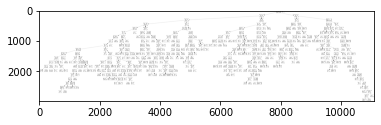

In [ ]:

features = ['Host','Ground', 'Opponents']

X = df[features]
y = df['MatchResult']

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(xtrain, ytrain)

ypred = dtree.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree_matresult.png')


img=pltimg.imread('decisiontree_matresult.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.516245487364621


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=13, random_state=0)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.6678700361010831


In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(xtrain, ytrain)
ypred = logit.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.5776173285198556
